In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk
import sklearn

In [2]:
df = pd.read_excel('data/Book1.xlsx')
df.head()

,text,Sentiment,Category
0,The SMS reminders from CreditCardCo are so va...,Negative,Reminder System
1,The credit card rewards program from CreditCa...,Negative,Reward Programme
2,The text message from CreditCardCo notifying ...,Negative,Miscellaneous
3,"Hey CreditCardCo, integrating payment reminde...",Neutral,Reminder System
4,Just discovered that CreditCardCo's so-called...,Negative,MisSelling


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       353 non-null    object
 1   Sentiment  353 non-null    object
 2   Category   353 non-null    object
dtypes: object(3)
memory usage: 8.4+ KB


# Removal of some Rows with 'channel of communication', 'Transportation','Mescilanious'

In [4]:
newdf = df.drop(df[(df['Category'] == 'Miscellaneous') | (df['Category'] == 'Channel of Communication') | (df['Category'] == 'Transparency of communication')].index, inplace=False)

In [5]:
newdf.shape

(270, 3)

In [6]:
clean= newdf['text']

# Remove Emails.

In [7]:
# Remove Emails
clean = [re.sub('\S*@\S*\s?', '', sent) for sent in clean]
clean[:5]

[' The SMS reminders from CreditCardCo are so vague and cryptic. How am I supposed to remember the due date without clear information#ConfusingMessages',
 " The credit card rewards program from CreditCardCo is so convoluted that I can't even figure out how to redeem my points. #RewardFrustration",
 ' Hey CreditCardCo, integrating payment reminder ales with viual assistant platforms like Siri or Google Assistant would make it convenient for customers to stay informed. #PaymentReminders',
 " Just discovered that CreditCardCo's so-called 'exclusive offer' for retired pensioners was nothing more than a trap. The hidden fees and high costs are pushing me into financial hardship. #DeceptiveSales #MisSelling",
 ' The notification from CreditCardCo about changes to my credit limit arrived after I had already made a large purchase. Poor timing and lack of consideration! #UntimelyCommunication']

In [8]:
# Remove new line characters
clean = [re.sub('\s+', ' ', sent) for sent in clean]

In [9]:
clean[:5]

[' The SMS reminders from CreditCardCo are so vague and cryptic. How am I supposed to remember the due date without clear information#ConfusingMessages',
 " The credit card rewards program from CreditCardCo is so convoluted that I can't even figure out how to redeem my points. #RewardFrustration",
 ' Hey CreditCardCo, integrating payment reminder ales with viual assistant platforms like Siri or Google Assistant would make it convenient for customers to stay informed. #PaymentReminders',
 " Just discovered that CreditCardCo's so-called 'exclusive offer' for retired pensioners was nothing more than a trap. The hidden fees and high costs are pushing me into financial hardship. #DeceptiveSales #MisSelling",
 ' The notification from CreditCardCo about changes to my credit limit arrived after I had already made a large purchase. Poor timing and lack of consideration! #UntimelyCommunication']

In [10]:
mydata = pd.Series(clean)

In [11]:
mydata

0       The SMS reminders from CreditCardCo are so va...
1       The credit card rewards program from CreditCa...
2       Hey CreditCardCo, integrating payment reminde...
3       Just discovered that CreditCardCo's so-called...
4       The notification from CreditCardCo about chan...
                             ...                        
265    BarclaysUKHelp Hi dropped you a few direct mes...
266    BarclaysUK just written to my wife to say they...
267    BarclaysUKHelp Your staff has cancelled my eld...
268    JenniButtonUSA SarahLiz2006 adamundefined I’m ...
269    Hello there Thanks for your post! I'm very sor...
Length: 270, dtype: object

In [12]:
mydata = mydata.apply(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x).lower())

In [13]:
mydata[4]

' the notification from creditcardco about changes to my credit limit arrived after i had already made a large purchase poor timing and lack of consideration untimelycommunication'

In [14]:
# now lets deal with stopwords 
# using nltk stopwords 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','re'])
len(stop_words)

181

In [15]:
from nltk import word_tokenize 

In [16]:
mydata = mydata.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [17]:
mydata[4]

'notification creditcardco changes credit limit arrived already made large purchase poor timing lack consideration untimelycommunication'

In [18]:
newdf = newdf.reset_index(drop=True)

In [19]:
newdf['clean_text']=mydata

In [20]:
newdf.head(5)

,text,Sentiment,Category,clean_text
0,The SMS reminders from CreditCardCo are so va...,Negative,Reminder System,sms reminders creditcardco vague cryptic suppo...
1,The credit card rewards program from CreditCa...,Negative,Reward Programme,credit card rewards program creditcardco convo...
2,"Hey CreditCardCo, integrating payment reminde...",Neutral,Reminder System,hey creditcardco integrating payment reminder ...
3,Just discovered that CreditCardCo's so-called...,Negative,MisSelling,discovered creditcardco called exclusive offer...
4,The notification from CreditCardCo about chan...,Negative,Reminder System,notification creditcardco changes credit limit...


In [21]:
words_list = []
for sentence in mydata:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
# freq_dist.keys()

[('creditcardco', 195),
 ('pricing', 63),
 ('card', 60),
 ('suppo', 50),
 ('credit', 42),
 ('customers', 41),
 ('customer', 39),
 ('thank', 36),
 ('reward', 34),
 ('feedback', 34),
 ('program', 29),
 ('product', 29),
 ('rewards', 28),
 ('time', 28),
 ('hey', 25),
 ('reminders', 24),
 ('reminder', 24),
 ('due', 21),
 ('payment', 21),
 ('like', 21)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'creditcardco'),
  Text(1, 0, 'pricing'),
  Text(2, 0, 'card'),
  Text(3, 0, 'suppo'),
  Text(4, 0, 'credit'),
  Text(5, 0, 'customers'),
  Text(6, 0, 'customer'),
  Text(7, 0, 'thank'),
  Text(8, 0, 'reward'),
  Text(9, 0, 'feedback'),
  Text(10, 0, 'program'),
  Text(11, 0, 'product'),
  Text(12, 0, 'rewards'),
  Text(13, 0, 'time'),
  Text(14, 0, 'hey'),
  Text(15, 0, 'reminders'),
  Text(16, 0, 'reminder'),
  Text(17, 0, 'due'),
  Text(18, 0, 'payment'),
  Text(19, 0, 'like'),
  Text(20, 0, 'fees'),
  Text(21, 0, 'structure'),
  Text(22, 0, 'high'),
  Text(23, 0, 'misselling'),
  Text(24, 0, 'issue'),
  Text(25, 0, 'points'),
  Text(26, 0, 'better'),
  Text(27, 0, 'team'),
  Text(28, 0, 'needs'),
  Text(29, 0, 'apologize')])

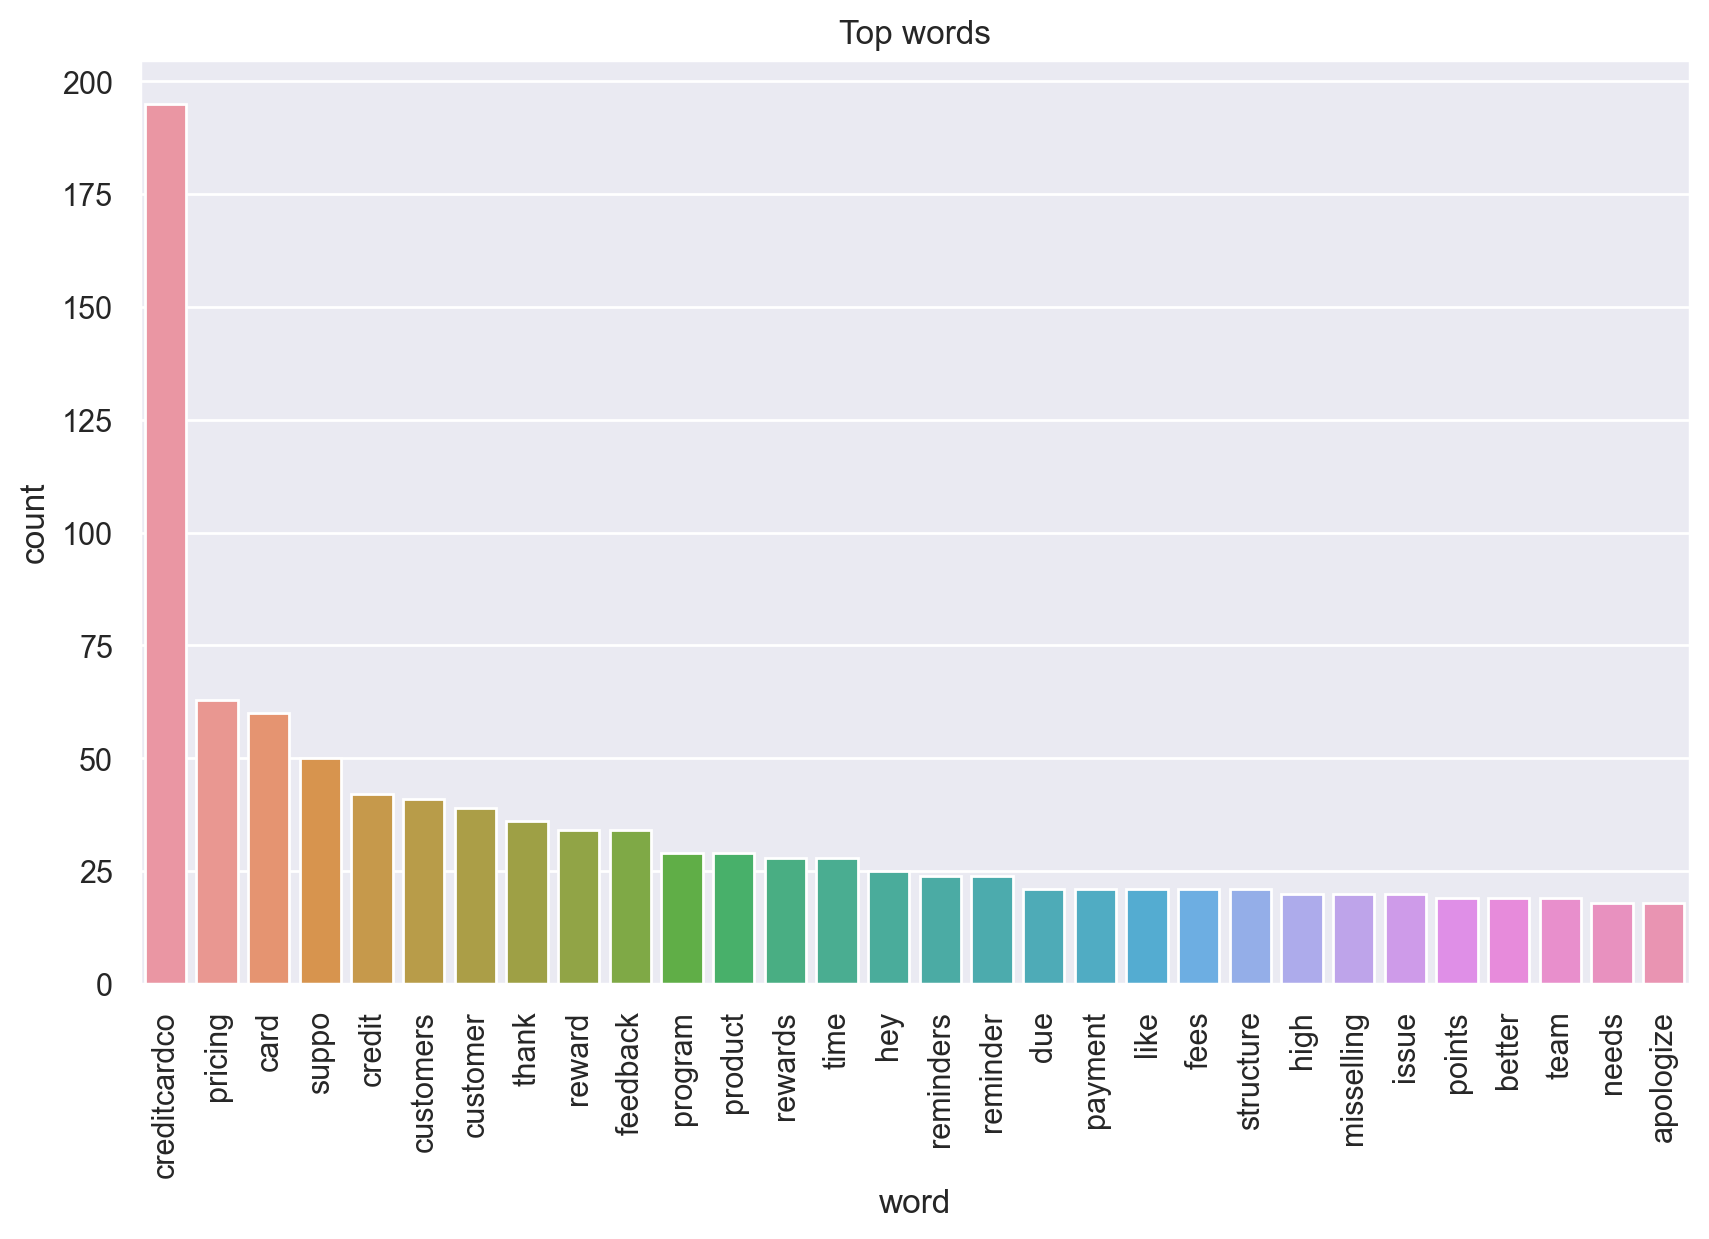

In [22]:
# creating a temporary dataframe and plotting the graph
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')

In [23]:
newdf.head(5)

,text,Sentiment,Category,clean_text
0,The SMS reminders from CreditCardCo are so va...,Negative,Reminder System,sms reminders creditcardco vague cryptic suppo...
1,The credit card rewards program from CreditCa...,Negative,Reward Programme,credit card rewards program creditcardco convo...
2,"Hey CreditCardCo, integrating payment reminde...",Neutral,Reminder System,hey creditcardco integrating payment reminder ...
3,Just discovered that CreditCardCo's so-called...,Negative,MisSelling,discovered creditcardco called exclusive offer...
4,The notification from CreditCardCo about chan...,Negative,Reminder System,notification creditcardco changes credit limit...


# using DeBERT-V3 model using zero shot technique

In [24]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli")

C:\Users\Satyam Dubey\Desktop\Random Test 02\boyzz\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
candidate_labels = ['reminder system',
'reward programme',
'misselling',
'product pricing',
'customer service'
]
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['clean_text'] + candidate_labels)

for risk in newdf['clean_text']:
    sequence_to_classify = risk
    classification = classifier(sequence_to_classify, candidate_labels, multi_label=False)

    # Sort labels based on scores in descending order
    sorted_labels = [label for _, label in sorted(zip(classification['scores'], classification['labels']), reverse=True)]

    # Create a dictionary for the current risk and its sorted labels
    result = {'clean_text': risk}
    for label in candidate_labels:
        result[label] = classification['scores'][classification['labels'].index(label)]

    # Convert the result dictionary to a DataFrame and append it to results_df
    result_df = pd.DataFrame(result, index=[0])
    results_df = pd.concat([results_df, result_df], ignore_index=True)

print(results_df)

                                            clean_text  reminder system  \
0    sms reminders creditcardco vague cryptic suppo...         0.970593   
1    credit card rewards program creditcardco convo...         0.001351   
2    hey creditcardco integrating payment reminder ...         0.935943   
3    discovered creditcardco called exclusive offer...         0.001970   
4    notification creditcardco changes credit limit...         0.404772   
..                                                 ...              ...   
265  barclaysukhelp dropped direct messages heard b...         0.016907   
266  barclaysuk written wife say regrettably reduce...         0.124914   
267  barclaysukhelp staff cancelled elderly grand m...         0.001743   
268  jennibuttonusa sarahliz adamundefined cracking...         0.122533   
269  hello thanks post sorry hear application card ...         0.024524   

     reward programme  misselling  product pricing  customer service  
0            0.002748    0.0

In [26]:
# Find the first highest label for each row and replace the value with the corresponding label
results_df['first_highest_label'] = results_df[candidate_labels].idxmax(axis=1)

# Find the second highest label for each row and replace the value with the corresponding label
second_highest_labels = results_df[candidate_labels].apply(lambda row: row.nlargest(2).idxmin(), axis=1)
results_df['second_highest_label'] = second_highest_labels

# Find the third highest label for each row and replace the value with the corresponding label
third_highest_labels = results_df[candidate_labels].apply(lambda row: row.nlargest(3).idxmin(), axis=1)
results_df['third_highest_label'] = third_highest_labels

results_df['label']= newdf['Category']

# Display the updated dataframe
results_df.head(10)

,clean_text,reminder system,reward programme,misselling,product pricing,customer service,first_highest_label,second_highest_label,third_highest_label,label
0,sms reminders creditcardco vague cryptic suppo...,0.970593,0.002748,0.007948,0.001254,0.017456,reminder system,customer service,misselling,Reminder System
1,credit card rewards program creditcardco convo...,0.001351,0.993427,0.003319,0.000711,0.001191,reward programme,misselling,reminder system,Reward Programme
2,hey creditcardco integrating payment reminder ...,0.935943,0.002580,0.001223,0.001457,0.058797,reminder system,customer service,reward programme,Reminder System
3,discovered creditcardco called exclusive offer...,0.001970,0.003972,0.990773,0.001732,0.001554,misselling,reward programme,reminder system,MisSelling
4,notification creditcardco changes credit limit...,0.404772,0.034222,0.040686,0.030901,0.489419,customer service,reminder system,misselling,Reminder System
5,feeling betrayed creditcardco marketed product...,0.001121,0.001292,0.956480,0.039973,0.001134,misselling,product pricing,reward programme,MisSelling
6,trusted creditcardco products suitable retired...,0.001264,0.001404,0.509129,0.487024,0.001179,misselling,product pricing,reward programme,MisSelling
7,loyal customer creditcardco reward program fee...,0.001077,0.948731,0.046044,0.001617,0.002531,reward programme,misselling,customer service,Reward Programme
8,creditcardco reward program needs major overha...,0.001205,0.995357,0.001622,0.000860,0.000956,reward programme,misselling,reminder system,Reward Programme
9,feeling betrayed creditcardco marketed product...,0.001121,0.001292,0.956480,0.039973,0.001134,misselling,product pricing,reward programme,MisSelling


In [27]:
replacement_mapping = {'Reminder System': 'reminder system', 'Reward Programme': 'reward programme', 'Inappropriate pricing': 'product pricing', 'Ineffectual Customer Service':'customer service', 'MisSelling':'misselling'}

In [28]:
results_df['label'].replace(replacement_mapping, inplace=True)

In [29]:
results_df.shape

(270, 10)

In [30]:
results_df.to_csv('output/Swapnil_Label_output.csv', index=False)

In [31]:
rows = results_df.shape[0]
print(rows)

270


In [32]:
match = 0
for i in range (rows):
    if results_df['first_highest_label'][i] == results_df['label'][i] or results_df['second_highest_label'][i] == results_df['label'][i] or results_df['third_highest_label'][i] == results_df['label'][i]:
        match+=1
mismatch=rows-match

In [33]:
print(match)
print(mismatch)

262
8


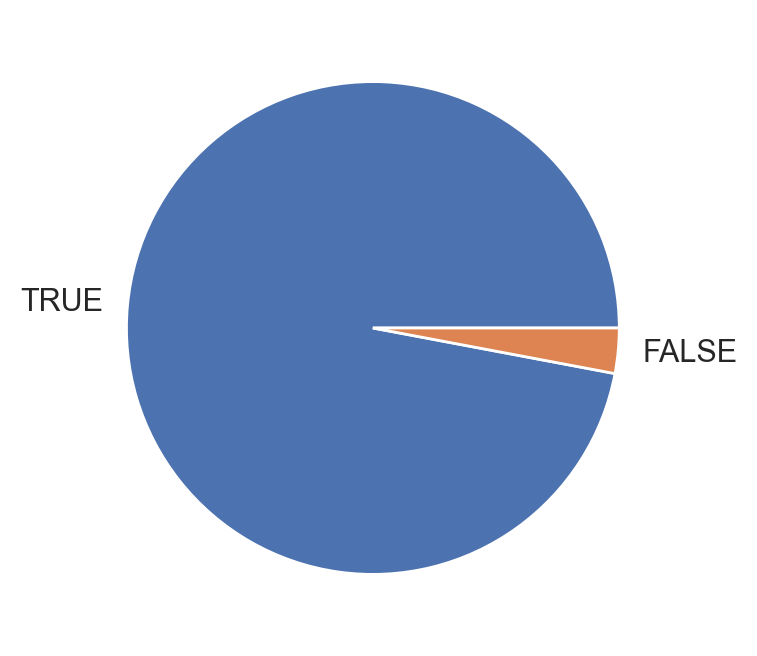

In [34]:

# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
prediction_class = ['TRUE', 'FALSE']
 
data = [match,mismatch]
 
# Creating plot
fig = plt.figure(figsize =(7, 4))
plt.pie(data, labels = prediction_class)
 
# show plot
plt.show()

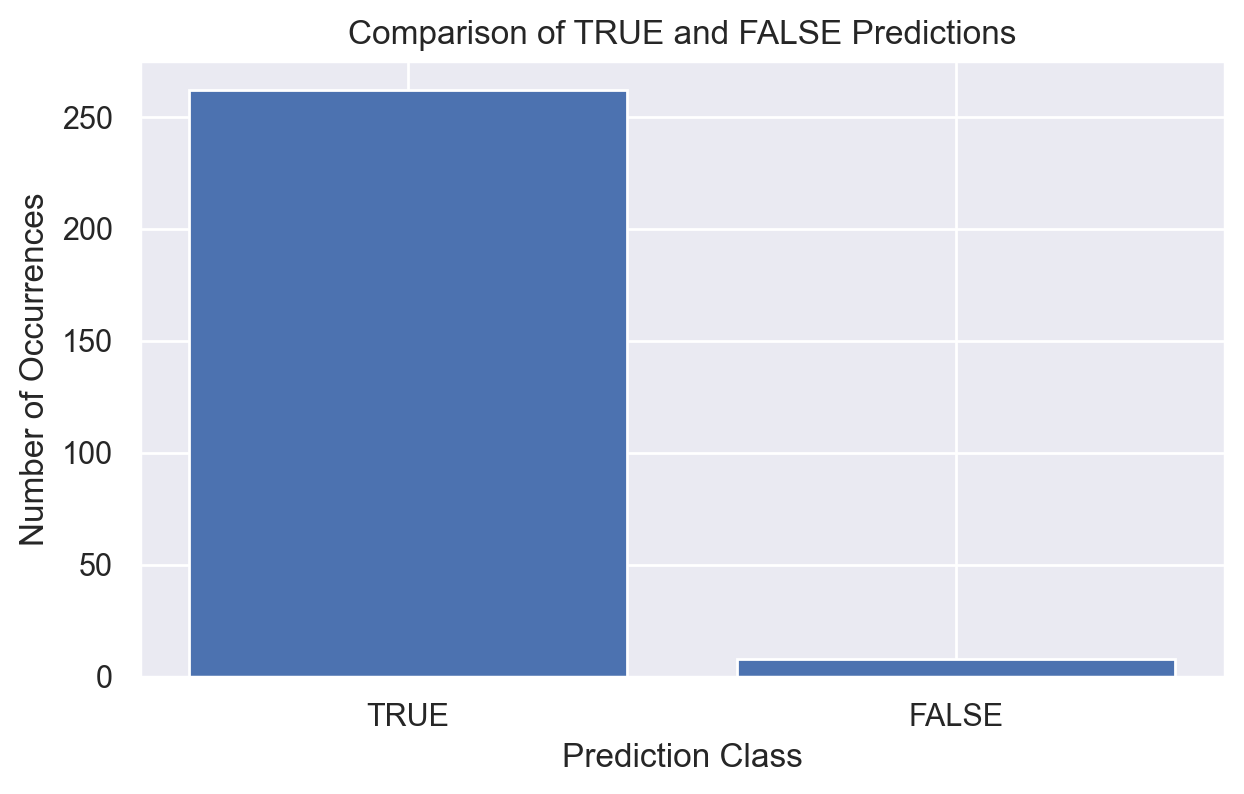

In [35]:
# Creating dataset
prediction_class = ['TRUE', 'FALSE']
data = [match, mismatch]

# Creating plot
fig = plt.figure(figsize=(7, 4))
plt.bar(prediction_class, data)

# Adding labels and title
plt.xlabel('Prediction Class')
plt.ylabel('Number of Occurrences')
plt.title('Comparison of TRUE and FALSE Predictions')

# Show plot
plt.show()

In [36]:
accuracy = (match*100)/rows


In [37]:
print(accuracy)

97.03703703703704


# Accuracy = 74.8148% 